# Data Loading

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Israeli-Palestinian Fatalities.csv to Israeli-Palestinian Fatalities (1).csv


In [ ]:
# Load the uploaded CSV file
data = pd.read_csv('Israeli-Palestinian Fatalities.csv')

In [ ]:
# Display the first few rows
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [ ]:
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,9/24/2023,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,9/24/2023,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,9/24/2023,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,9/22/2023,16.0,Palestinian,Kfar Dan,Jenin,West Bank,9/22/2023,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,9/20/2023,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,9/20/2023,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,9/19/2023,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,9/19/2023,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# Initial Inspection

Check for Missing Values

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 age                              129
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
notes                            280
dtype: int64


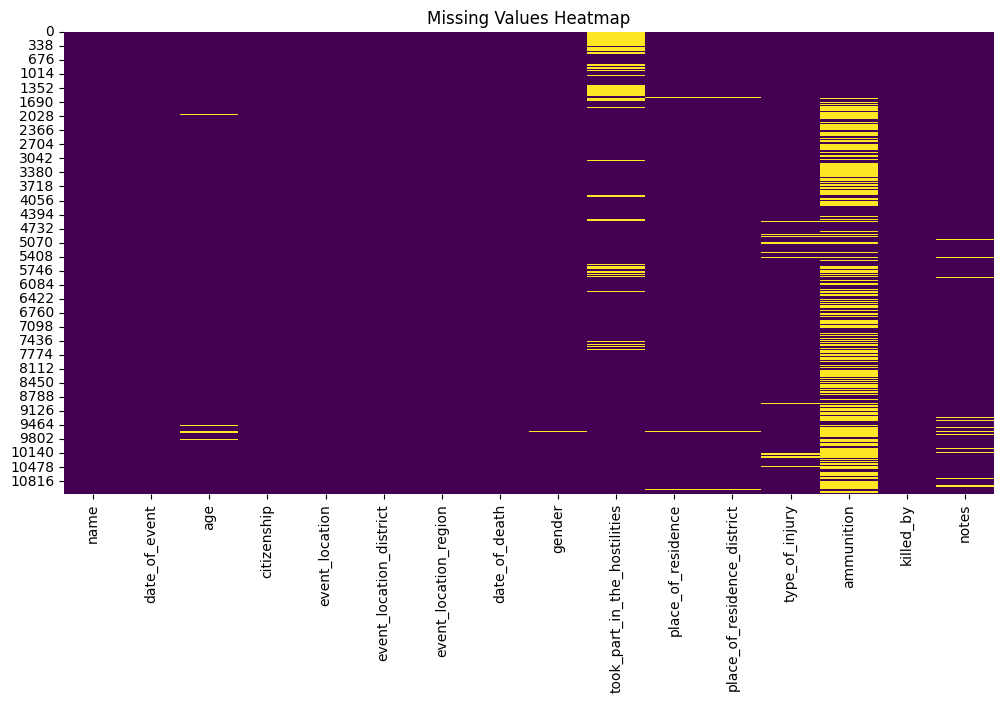

In [ ]:
# Visualizing Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
data.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


# UNIVARIATE ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



*   Age Distribution (Numerical Variable)




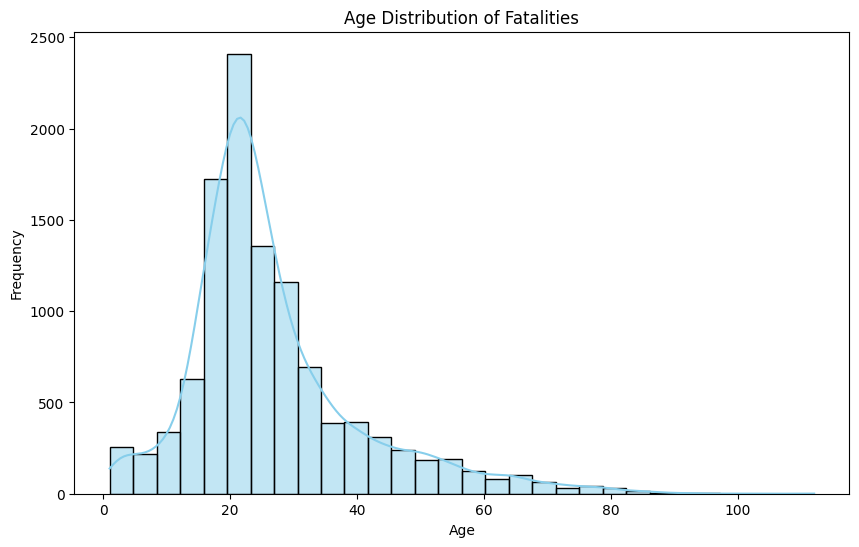

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Fatalities')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



*   Gender Distribution (Categorical Variable)



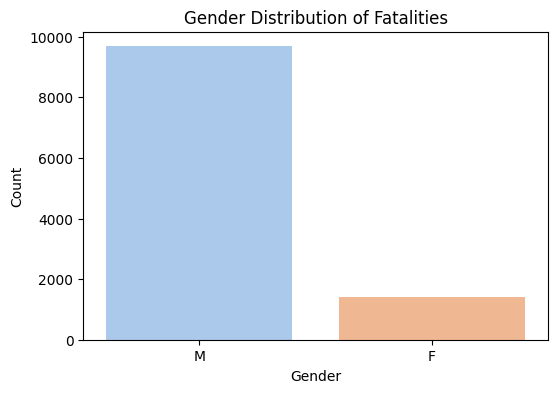

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data, hue='gender', palette='pastel', legend=False)
plt.title('Gender Distribution of Fatalities')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

*   Citizenship Distribution (Categorical Variable)

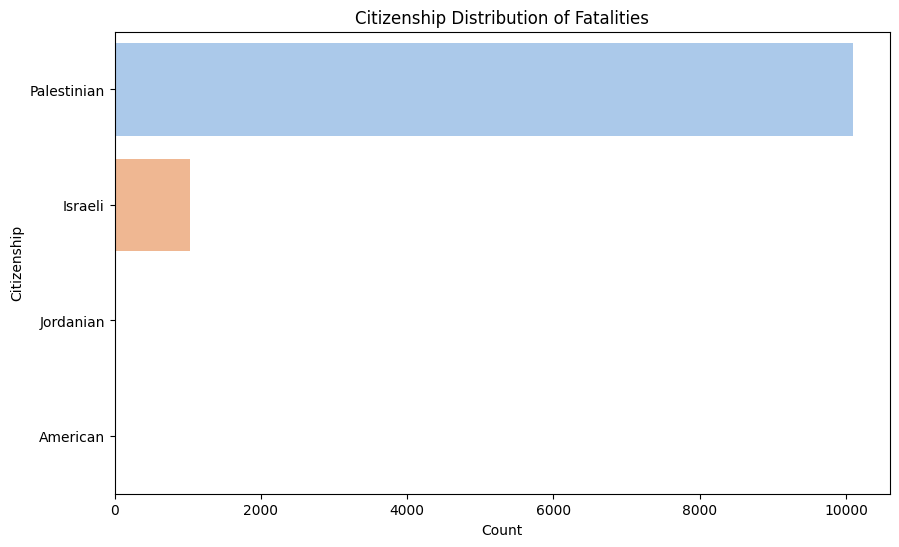

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='citizenship', data=data, hue='citizenship', palette='pastel', legend=False)
plt.title('Citizenship Distribution of Fatalities')
plt.xlabel('Count')
plt.ylabel('Citizenship')
plt.show()

Defining Numerical and Categorical Variables

In [ ]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['age']
Categorical Columns: ['name', 'date_of_event', 'citizenship', 'event_location', 'event_location_district', 'event_location_region', 'date_of_death', 'gender', 'took_part_in_the_hostilities', 'place_of_residence', 'place_of_residence_district', 'type_of_injury', 'ammunition', 'killed_by', 'notes']


Fill Missing Values

In [ ]:
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

Verify Missing Value Handling

In [ ]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

Missing Values in Each Column:
 Series([], dtype: int64)


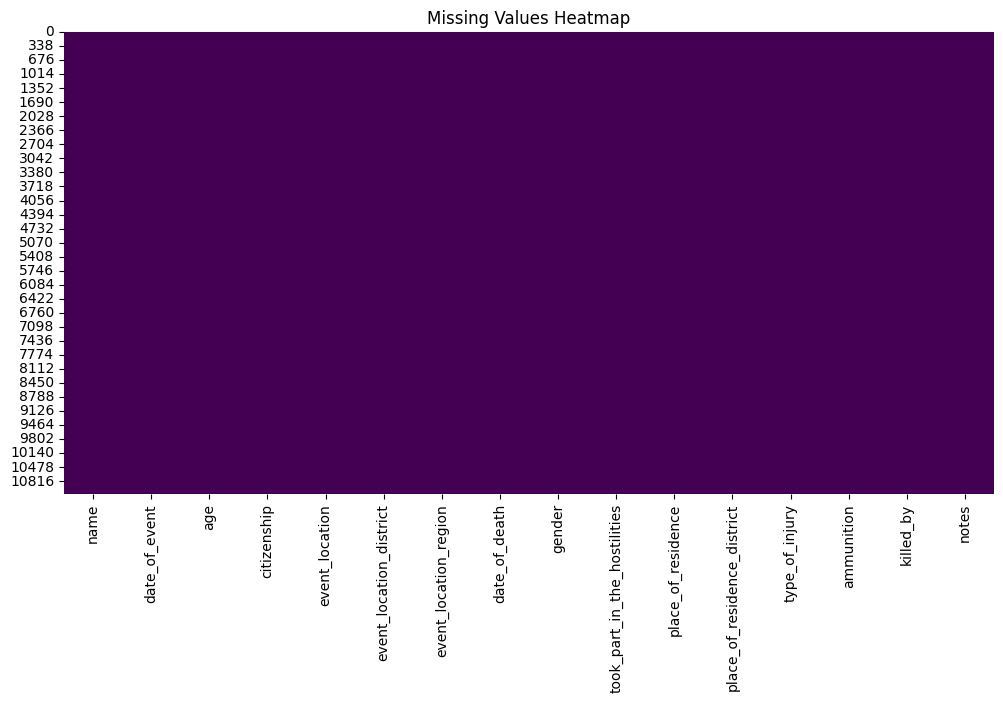

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
print("Data Summary After Handling Missing Values:\n", data.describe())

Data Summary After Handling Missing Values:
                 age
count  11124.000000
mean      26.745703
std       13.700404
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000


# MULTIVARIATE ANALYSIS

In [ ]:
print(data.dtypes)

name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object


In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

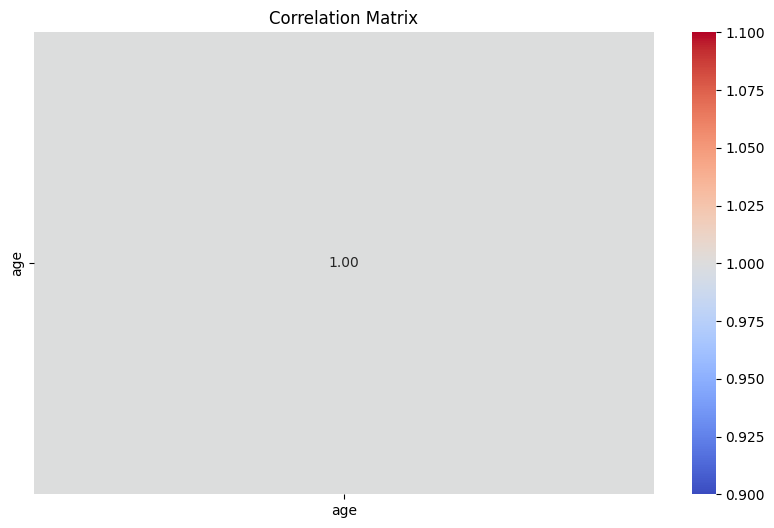

In [ ]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Age Distribution by Gender

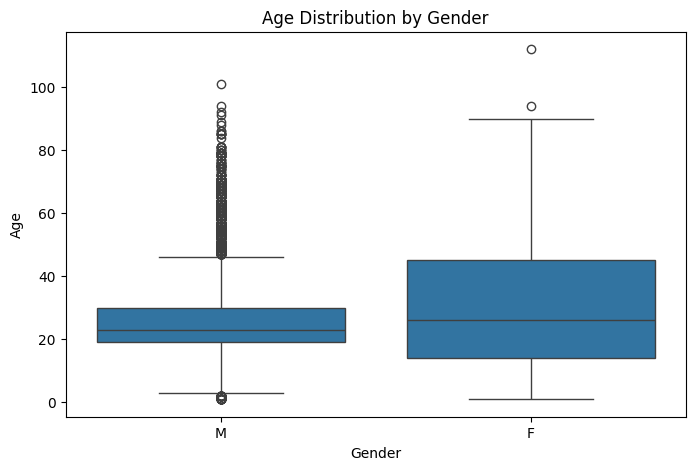

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

Gender Distribution by Citizenship


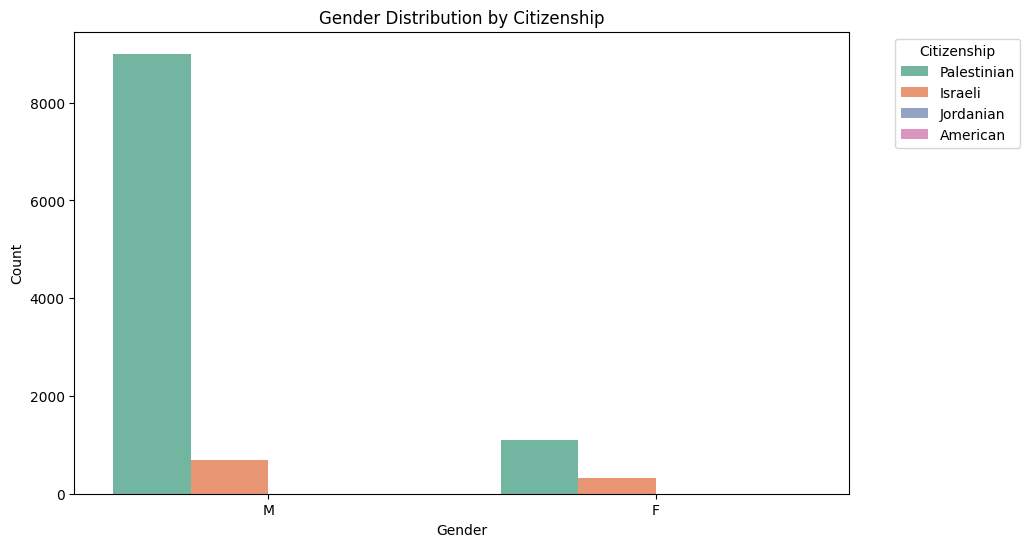

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='citizenship', data=data, palette='Set2')
plt.title('Gender Distribution by Citizenship')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Pairplot for Numerical Features

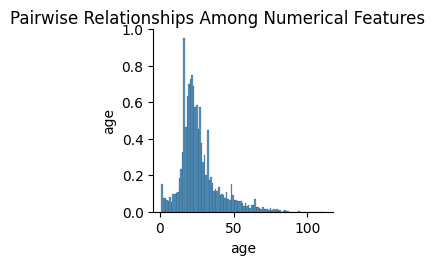

In [ ]:
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairwise Relationships Among Numerical Features', y=1.02)
plt.show()

HEATMAPS

Heatmap for Gender and Citizenship

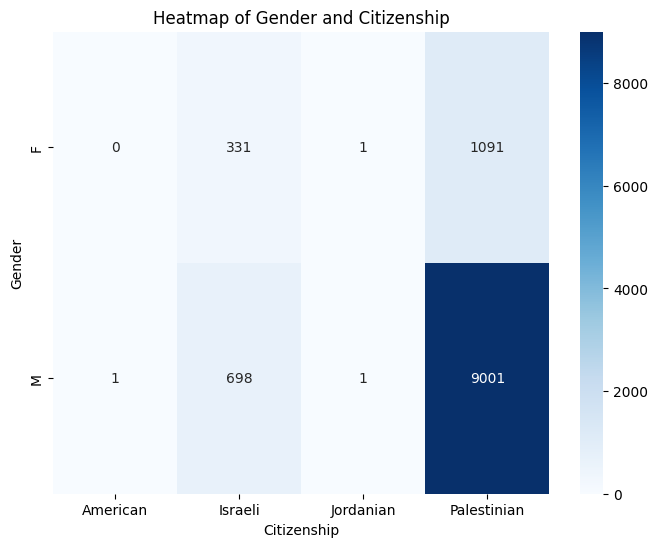

In [ ]:
plt.figure(figsize=(8, 6))
gender_citizenship_counts = pd.crosstab(data['gender'], data['citizenship'])
sns.heatmap(gender_citizenship_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Gender and Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Gender')
plt.show()

Heatmap for Age Distribution by Gender

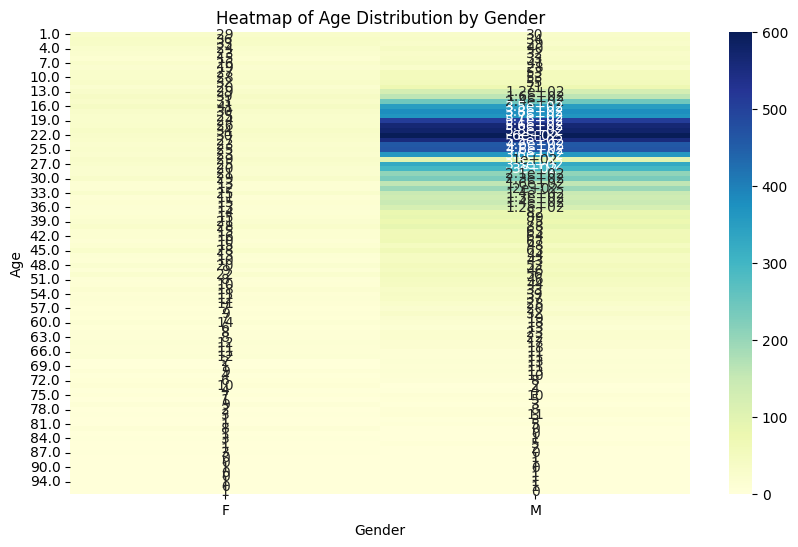

In [ ]:
plt.figure(figsize=(10, 6))
age_gender_counts = pd.crosstab(data['age'], data['gender'])
sns.heatmap(age_gender_counts, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Heatmap of Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# Additional Statistical Calculations

*   Descriptive Statistics




In [ ]:
descriptive_stats = data[numerical_cols].describe()
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                 age
count  11124.000000
mean      26.745703
std       13.700404
min        1.000000
25%       19.000000
50%       23.000000
75%       31.000000
max      112.000000


*   Value Counts for Categorical Variables

In [ ]:
citizenship_counts = data['citizenship'].value_counts()
gender_counts = data['gender'].value_counts()
print("Citizenship Counts:\n", citizenship_counts)
print("Gender Counts:\n", gender_counts)

Citizenship Counts:
 citizenship
Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: count, dtype: int64
Gender Counts:
 gender
M    9701
F    1423
Name: count, dtype: int64


*   Grouped Statistics

In [ ]:
mean_age_by_citizenship = data.groupby('citizenship')['age'].mean()
print("Mean Age by Citizenship:\n", mean_age_by_citizenship)

Mean Age by Citizenship:
 citizenship
American       16.000000
Israeli        35.770123
Jordanian      33.000000
Palestinian    25.825380
Name: age, dtype: float64


In [ ]:
mean_age_by_gender_citizenship = data.groupby(['gender', 'citizenship'])['age'].mean().unstack()
print("Mean Age by Gender and Citizenship:\n", mean_age_by_gender_citizenship)

Mean Age by Gender and Citizenship:
 citizenship  American    Israeli  Jordanian  Palestinian
gender                                                  
F                 NaN  37.472732       26.0    27.883732
M                16.0  34.962726       40.0    25.575890


Visualizing Grouped Statistics

*   Bar Plot for Mean Age by Citizenship





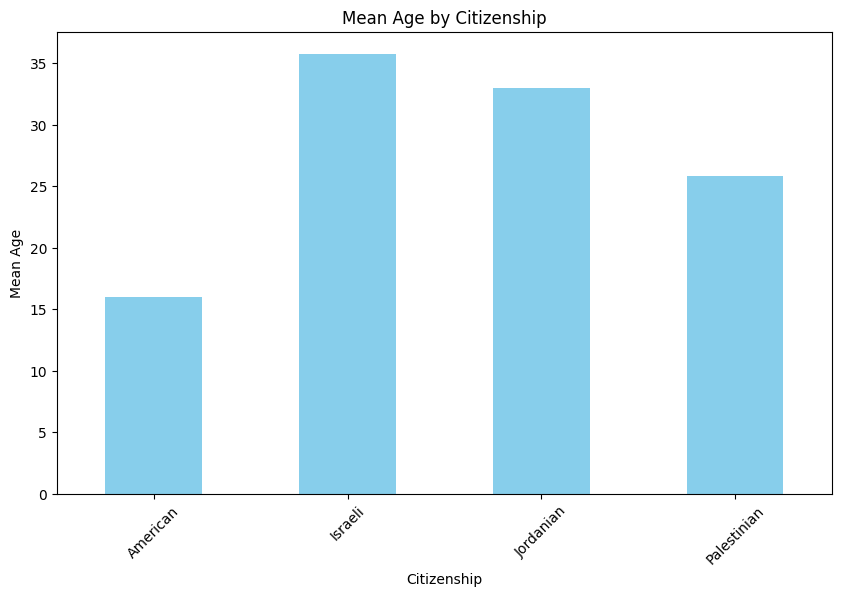

In [ ]:
plt.figure(figsize=(10, 6))
mean_age_by_citizenship.plot(kind='bar', color='skyblue')
plt.title('Mean Age by Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Mean Age')
plt.xticks(rotation=45)
plt.show()

*   Heatmap for Mean Age by Gender and Citizenship

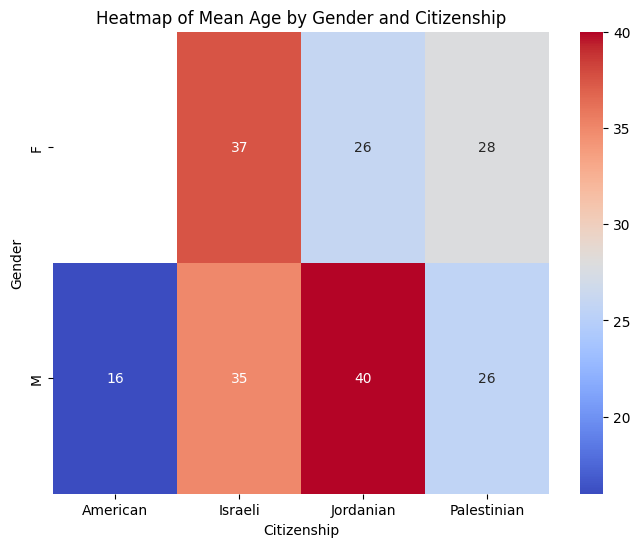

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(mean_age_by_gender_citizenship, annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Age by Gender and Citizenship')
plt.xlabel('Citizenship')
plt.ylabel('Gender')
plt.show()